<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1
---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Outside Research

Many measures have been put in place to reduce the spread of Dengue in Singapore, one of which is Project Walbachia. Male mosquitoes carrying the Walbachia bacteria are reared and released regularly, the eggs produced by females breeding with these mosquitoes will not hatch, thereby reducing the Aedes mosquito population and by effect reducing the spread of Dengue.

Currently the mosquitoes are released at regular biweekly intervals, however there is difficulty in upscaling the project due to lack of resources and manpower.

Studies have shown that mosquitoes are most active at a temperature range around 27.5°C. Presence of stagnant water bodies will also provide more potential habitats for the growth of mosquito larva. The relationship between weather patterns and the number of Dengue cases may be studied to propose a more optimised schedule for the release of Walbachia carrying mosquitoes.

## Problem Statement

High incidences of dengue fever is a persistent issue in Singapore despite measures taken by the government to curb it. For example, an increase in rainfall could lead to an increase in the population of mosquitoes, which in turn leads to higher incidences of dengue fever. 

With the implementation of Project Wolbachia, the drop in the number of dengue cases has been observed. However, the release of Wolbachia mosquitoes are currently carried out on a weekly basis, which could be resource intensive and have a negative ecological impact.

As mosquito activity is highly influenced by weather conditions, this project aims to analyse trends in Singapore weather and the number of dengue cases between 2014 to 2018. This analysis can be used to help NEA plan optimal time periods for the release of the male Wolbachia-Aedes mosquitoes into the environment to enhance effectiveness of Project Wolbachia. This can in turn curb dengue transmission to decrease the number of dengue cases.

### Choosing Data

The following data sets will be used for the project:
1. rainfall_monthly_number_rainydays.csv (original name was: rainfall-monthly-number-of-rain-days.csv, provided by GA)
    - contains the number of rainy days per month from 1982 to 2022
2. rainfall_monthly_total_mm.csv (original name was: rainfall-monthly-total.cs, provided by GA)
    - contains the number of rainy days per month from 1982 to 2022  
3. rel_humidity_monthly_mean.csv (taken from data.gov.sg)
    - contains the mean humidity for each month from 1982 to 2023
4. temp_monthly_mean.csv (taken from data.gov.sg)
    - contains the mean air temperature for each month from 1982 to 2023
5. weekly_numbers_dengue_fever_cases.csv (taken from data.gov.sg)
    - contains the number of cases of dengue and dengue haemorrhagic fever per week from 2014 to 2018

However for consistency and comparability across all data sets, the data from the period 2014 to 2018 will be used for analysis only.

### Imports

In [3]:
# Imports:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import calendar

## Data Import and Cleaning

Here we import the above mentioned datasets into the project.

In [6]:
# Importing 5 datasets: dengue cases, numeber of rainy days per month, total rainfall per month,
# mean temp per month, mean relative humidity per month
dengue = pd.read_csv('../data/dengue-cases.csv')
rainy_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
rainfall = pd.read_csv('../data/rainfall-monthly-total.csv')
temp = pd.read_csv('../data/monthly-mean-temp.csv')
rh = pd.read_csv('../data/monthly-mean-rh.csv')

#### Cleaning for `dengue` dataset
We perform a check on the `dengue` dataset using `.head()` to check the first 5 rows, and `.info()` to summarise the contents of the dataset

In [ ]:
# Print first 5 rows of dengue dataset
dengue.head()

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [8]:
# Check info of dengue dataset
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         530 non-null    int64  
 1   eweek        530 non-null    int64  
 2   type_dengue  530 non-null    object 
 3   number       522 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.7+ KB


Null values were identified in the dataset, we will filter rows with null values out of the dataset.

In [9]:
# Remove nulls from dengue dataset
dengue = dengue[~dengue['number'].isna()]
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 527
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         522 non-null    int64  
 1   eweek        522 non-null    int64  
 2   type_dengue  522 non-null    object 
 3   number       522 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 20.4+ KB


We do not need to distinguish between DHF and standard dengue for our project. Thus, we will combine the total number of dengue cases for both dengue and DHF under the `number` column.

In [10]:
# Compute sum of both dengue types for each week
denguetemp = dengue.loc[dengue['type_dengue'] == 'DHF', :].reset_index()
dengue = dengue.loc[dengue['type_dengue'] == 'Dengue', :].reset_index()
dengue['number'] = dengue['number'] + denguetemp['number']
dengue

,index,year,eweek,type_dengue,number
0,0,2014,1,Dengue,437.0
1,2,2014,2,Dengue,479.0
2,4,2014,3,Dengue,401.0
3,6,2014,4,Dengue,336.0
4,8,2014,5,Dengue,234.0
...,...,...,...,...,...
256,518,2018,48,Dengue,109.0
257,520,2018,49,Dengue,114.0
258,522,2018,50,Dengue,108.0
259,524,2018,51,Dengue,128.0


To work with the datetime format for our analysis, we make the following amendments to the dataset:

- Start `eweek` from 0 instead of 1.

- Use custom function `defweek` to create `yearweek` column, which creates a string column in the format YY-MM-D (where D is the day of the week instead of the month). This column is then converted to the datetime format.

- Drop unnecessary columns.

In [12]:
# Current week count starts at 1, we amend the column to start at 0 (datetime format)
dengue['eweek'] = dengue['eweek'] - 1

# Function to format the week column to have trailing zeros when week < 10 (seems to be required for datetime)
# Additonal digit at the end (values in startday dict) represents day of the week (also seems to be required)
def weekformat(week, yr):
    startday = {2014:3, 2015:4, 2016:5, 2017:0, 2018:1}
    if week < 10:
        return '0' + str(week) + '-' + str(startday[yr])
    else:
        return str(week) + '-' + str(startday[yr])

In [13]:
# Applying the above function to the dengue eweek column
dengue['week2'] = dengue.apply(lambda x: weekformat(x.eweek, x.year), axis=1)

In [14]:
# astype(str) converts the items in the year and eweek series to type str
# then both series are concatenated using str.cat
yearweek = dengue['year'].astype(str).str.cat(dengue['week2'].astype(str), sep='-')
dengue.insert(loc=0, column='yearweek', value=yearweek)
dengue.head()

,yearweek,index,year,eweek,type_dengue,number,week2
0,2014-00-3,0,2014,0,Dengue,437.0,00-3
1,2014-01-3,2,2014,1,Dengue,479.0,01-3
2,2014-02-3,4,2014,2,Dengue,401.0,02-3
3,2014-03-3,6,2014,3,Dengue,336.0,03-3
4,2014-04-3,8,2014,4,Dengue,234.0,04-3


In [15]:
# Dropping unnecessary columns
dengue.drop(columns=['type_dengue', 'index', 'year', 'eweek', 'week2'], inplace=True)
dengue

,yearweek,number
0,2014-00-3,437.0
1,2014-01-3,479.0
2,2014-02-3,401.0
3,2014-03-3,336.0
4,2014-04-3,234.0
...,...,...
256,2018-47-1,109.0
257,2018-48-1,114.0
258,2018-49-1,108.0
259,2018-50-1,128.0


In [16]:
# convert date column in dengue dataset to datetime format
dengue['yearweek'] = pd.to_datetime(dengue['yearweek'], format='%Y-%W-%w')

Data checking at this point shows that there is a repeating date for data points at index 209 and 210. We will manually modify the yearweek column to rectify the issue.

In [17]:
# For some reason, there is a repeat date for data points at index 209 and 210
dengue[dengue['yearweek'].dt.year ==2018].head()

,yearweek,number
209,2018-01-01,83.0
210,2018-01-01,68.0
211,2018-01-08,54.0
212,2018-01-15,45.0
213,2018-01-22,48.0


In [18]:
# Amending the yearweek column to fix this issue
dengue['yearweek'].loc[210:] = dengue['yearweek'].loc[210:] +  timedelta(days = 7)

C:\Users\Aspire\AppData\Local\Temp\ipykernel_10528\3429686126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue['yearweek'].loc[210:] = dengue['yearweek'].loc[210:] +  timedelta(days = 7)


In [19]:
# Checking the dataset 
dengue[dengue['yearweek'].dt.year ==2018].head()

,yearweek,number
209,2018-01-01,83.0
210,2018-01-08,68.0
211,2018-01-15,54.0
212,2018-01-22,45.0
213,2018-01-29,48.0


#### Cleaning for remaining datasets
We perform a check on the remaining four datasets using `.head()` to check the first 5 rows, and `.info()` to summarise the contents of the datasets.

In [20]:
# Print first 5 rows of rainy_days dataset
rainy_days.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [21]:
# Print first 5 rows of rainfall dataset
rainfall.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [22]:
# Print first 5 rows of temp dataset
temp.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [23]:
# Print first 5 rows of rh dataset
rh.head()

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [24]:
# Checking info for the datasets
dengue.info()
print('\n')
rainy_days.info()
print('\n')
rainfall.info()
print('\n')
temp.info()
print('\n')
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   yearweek  261 non-null    datetime64[ns]
 1   number    261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(

Based on the above info, there appear to be no null values in the remaining datasets. Since these datasets are similarly indexed by year-month, we will merge them into a single `weather` dataset, for convenience during the EDA and visualisation steps.

In [25]:
# Combining all weather statistics into a single dataset 'weather'
weather = pd.merge(rainfall, rainy_days, how='inner')
weather = pd.merge(weather, temp, how='inner')
weather = pd.merge(weather, rh, how='inner')

In [26]:
# Checking shape of combined weather dataset
weather.shape

(488, 5)

In [27]:
weather.head()

,month,total_rainfall,no_of_rainy_days,mean_temp,mean_rh
0,1982-01,107.1,10,25.9,81.2
1,1982-02,27.8,5,27.1,79.5
2,1982-03,160.8,11,27.2,82.3
3,1982-04,157.0,14,27.0,85.9
4,1982-05,102.2,10,28.0,83.2


In [28]:
# convert date column in weather dataset to datetime format
weather['month'] = pd.to_datetime(weather['month'], format='%Y-%m')

In [29]:
# Renaming columns to be more Python friendly
weather = weather.rename(columns= {'month':'date', 'total_rainfall':'rainfall','no_of_rainy_days':'raindays',
                         'mean_temp':'temp', 'mean_rh':'rh'})
weather.head()

,date,rainfall,raindays,temp,rh
0,1982-01-01,107.1,10,25.9,81.2
1,1982-02-01,27.8,5,27.1,79.5
2,1982-03-01,160.8,11,27.2,82.3
3,1982-04-01,157.0,14,27.0,85.9
4,1982-05-01,102.2,10,28.0,83.2


In [30]:
# Filtering dataset to points between 2014 and 2018
weather = weather.loc[(weather['date'].dt.year > 2013) & (weather['date'].dt.year < 2019)].reset_index()
weather.drop(columns=['index'], inplace=True)
weather.head()

,date,rainfall,raindays,temp,rh
0,2014-01-01,75.4,5,26.2,78.5
1,2014-02-01,0.2,1,27.2,74.5
2,2014-03-01,66.0,6,27.9,76.0
3,2014-04-01,110.0,17,28.2,80.0
4,2014-05-01,125.8,18,28.6,80.2


In [50]:
# Checking new shape of weather dataset
weather.shape

(60, 5)

In [63]:
# Exporting dengue and weather datasets to .csv format
dengue.to_csv('../data/dengue.csv')
weather.to_csv('../data/weather.csv')

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|yearweek|datetime|dengue|Date in YYYY-MM-DD|
|number|int|dengue|Number of dengue cases during the specified week |
|date|datetime|weather|Date in YYYY-MM-DD|
|rainfall|float|weather|Total rainfall during the specified month in mm|
|raindays|int|weather|Total number of days with rainfall during the specified month| 
|temp|float|weather|Mean monthly temperature in SG (°C)|
|rh|float|weather|Mean monthly relative humidity in SG| 




## Exploratory Data Analysis

We perform the following steps as part of our EDA process:

1. Summary statistics using `.describe()`.

2. Investigate trends in the data.

    We investigate the following information for a better understanding of our dataset:
    
    - Which months have the highest and lowest total rainfall?
    - Which years have the highest and lowest total rainfall in the date range of analysis?
    - Which months have the highest and lowest number of rainy days?
    - Which year have the highest and lowest number of rainy days in the date range of analysis?
    - Are there any outliers months in the dataset?


In [33]:
# Summary statistics for dengue dataframe ('number' column)
dengue['number'].describe()

count    261.000000
mean     186.800766
std      158.826461
min       24.000000
25%       62.000000
50%      158.000000
75%      250.000000
max      891.000000
Name: number, dtype: float64

In [34]:
# Summary statistics for weather dataframe
weather.describe()

,date,rainfall,raindays,temp,rh
count,60,60.000000,60.000000,60.000000,60.000000
mean,2016-06-16 01:36:00,141.916667,14.133333,28.033333,78.720000
min,2014-01-01 00:00:00,0.200000,1.000000,26.100000,72.000000
25%,2015-03-24 06:00:00,84.050000,10.000000,27.475000,76.525000
50%,2016-06-16 00:00:00,126.200000,14.000000,28.200000,78.450000
75%,2017-09-08 12:00:00,185.850000,18.250000,28.500000,80.400000
max,2018-12-01 00:00:00,371.200000,27.000000,29.400000,86.600000
std,NaN,79.721443,5.768020,0.741658,3.312114


In [37]:
'''
Defining a function to help with EDA, weathermonth()
Input is 3 parameters:
    year1 is the year being investigated.
    colmn represents the column name being investigated (from the weather dataset).
    order is binary input, 0 to return highest and 1 to return lowest.
Output is a tuple of 2 items:
    returnmonth is the month with the highest/lowest value for the investigated column (as a string).
    returnval is this highest/lowest value.
'''
def weathermonth(year1, colmn, order):
    returnmonth = calendar.month_name[(weather[weather['date'].dt.year == year1].sort_values([colmn], ascending=order)
            .reset_index() ['date'][0]).month]
    returnval = (weather[weather['date'].dt.year == year1].sort_values([colmn], ascending=order)
            .reset_index() [colmn][0])
    return (returnmonth, returnval)

In [38]:
'''
Defining a function to help with EDA, weatheryear()
Input is 4 parameters:
    year1 and year2 represent the range of years being investigated (inclusive).
    colmn represents the column name being investigated (from the weather dataset).
    order determines the arrangement, 0 to return highest, otherwise will return lowest.
Output is a tuple of 2 items:
    First item is the year with the highest/lowest total value for the investigated column.
    Second item is this highest/lowest value.
'''
def weatheryear(year1, year2, colmn, order):
    yr_dict = {}
    for yr in range(year1, year2 + 1):
        total = 0
        for mth in range(1, 13):
            filter = weather.loc[(weather['date'].dt.year == yr) & (weather['date'].dt.month == mth), :]
            total = round(total + filter[colmn].to_numpy()[0], 1)
        yr_dict[total] = yr
    if order == 0:
        return (yr_dict[max(yr_dict.keys())], max(yr_dict.keys()) )
    else:
        return (yr_dict[min(yr_dict.keys())], min(yr_dict.keys()) )

In [39]:
# Defining function for determining outlier points based on interquartile range

def outlier(colmn):
    # finding the 1st quartile
    q1 = np.quantile(weather[colmn], 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(weather[colmn], 0.75)
    med = np.median(weather[colmn])
    # finding the iqr region
    iqr = q3-q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers = weather[(weather[colmn] <= lower_bound) | (weather[colmn] >= upper_bound)]
    return (outliers)

In [40]:
outlier('rainfall')

# One outlier point in the weather dataset, based on the rainfall column

,date,rainfall,raindays,temp,rh
47,2017-12-01,371.2,23,27.0,85.2


In [41]:
outlier('raindays')

# No outlier points based on the raindays column

,date,rainfall,raindays,temp,rh


In [42]:
outlier('rh')

# 2 outlier points in the weather dataset, based on the rh column

,date,rainfall,raindays,temp,rh
46,2017-11-01,268.6,24,27.1,86.3
48,2018-01-01,287.0,25,26.1,86.6


In [43]:
outlier('temp')

# No outlier points based on the temp column

,date,rainfall,raindays,temp,rh


In [44]:
print('(1)')
for yr in range(2014, 2019):
    print("Highest rainfall in " + str(yr) + " is in " + weathermonth(yr, 'rainfall', 0)[0] + " with " + str(weathermonth(yr, 'rainfall', 0)[1]) + "mm.")
    print("Lowest rainfall in " + str(yr) + " is in " + weathermonth(yr, 'rainfall', 1)[0] + " with " + str(weathermonth(yr, 'rainfall', 1)[1]) + "mm.\n")

print('(2)')
print("Highest rainfall in range 2014-2018 is in " + str(weatheryear(2014, 2018, 'rainfall', 0)[0]) + " with " + str(weatheryear(2014, 2018, 'rainfall', 0)[1]) + "mm total.")
print("Lowest rainfall in range 2014-2018 is in " + str(weatheryear(2014, 2018, 'rainfall', 1)[0]) + " with " + str(weatheryear(2014, 2018, 'rainfall', 1)[1]) + "mm total.\n")

(1)
Highest rainfall in 2014 is in November with 250.8mm.
Lowest rainfall in 2014 is in February with 0.2mm.

Highest rainfall in 2015 is in December with 302.3mm.
Lowest rainfall in 2015 is in February with 18.8mm.

Highest rainfall in 2016 is in December with 292.6mm.
Lowest rainfall in 2016 is in March with 6.2mm.

Highest rainfall in 2017 is in December with 371.2mm.
Lowest rainfall in 2017 is in July with 79.6mm.

Highest rainfall in 2018 is in January with 287.0mm.
Lowest rainfall in 2018 is in February with 14.8mm.

(2)
Highest rainfall in range 2014-2018 is in 2017 with 2045.6mm total.
Lowest rainfall in range 2014-2018 is in 2015 with 1267.1mm total.



In [45]:
print('(3)')
for yr in range(2014, 2019):
    print("Highest number of rainy days in " + str(yr) + " is in " + weathermonth(yr, 'raindays', 0)[0] + " with " + str(weathermonth(yr, 'raindays', 0)[1]) + " days.")
    print("Lowest number of rainy days in " + str(yr) + " is in " + weathermonth(yr, 'raindays', 1)[0] + " with " + str(weathermonth(yr, 'raindays', 1)[1]) + " day(s).\n")

print("(4)")
print("Most rainy days in range 2014-2018 is in " + str(weatheryear(2014, 2018, 'raindays', 0)[0]) + " with " + str(weatheryear(2014, 2018, 'raindays', 0)[1]) + " days total.")
print("Least rainy days in range 2014-2018 is in " + str(weatheryear(2014, 2018, 'raindays', 1)[0]) + " with " + str(weatheryear(2014, 2018, 'raindays', 1)[1]) + " days total.\n")

print("(5)")
print('No outlier points appear for the number of rainy days and mean temperature columns.')
print('1 outlier appears for the mean total rainfall column, on 2017-12-01, at 371.2mm.')
print('2 outliers appear for the mean relative humidity column. First on 2017-11-01, at 86.3. Second on 2018-01-01, at 86.6.')


(3)
Highest number of rainy days in 2014 is in November with 23 days.
Lowest number of rainy days in 2014 is in February with 1 day(s).

Highest number of rainy days in 2015 is in December with 19 days.
Lowest number of rainy days in 2015 is in March with 5 day(s).

Highest number of rainy days in 2016 is in December with 23 days.
Lowest number of rainy days in 2016 is in March with 6 day(s).

Highest number of rainy days in 2017 is in November with 24 days.
Lowest number of rainy days in 2017 is in July with 9 day(s).

Highest number of rainy days in 2018 is in November with 27 days.
Lowest number of rainy days in 2018 is in February with 5 day(s).

(4)
Most rainy days in range 2014-2018 is in 2017 with 204 days total.
Least rainy days in range 2014-2018 is in 2015 with 125 days total.

(5)
No outlier points appear for the number of rainy days and mean temperature columns.
1 outlier appears for the mean total rainfall column, on 2017-12-01, at 371.2mm.
2 outliers appear for the mean r

## Visualize the Data



### Lineplot for timeseries

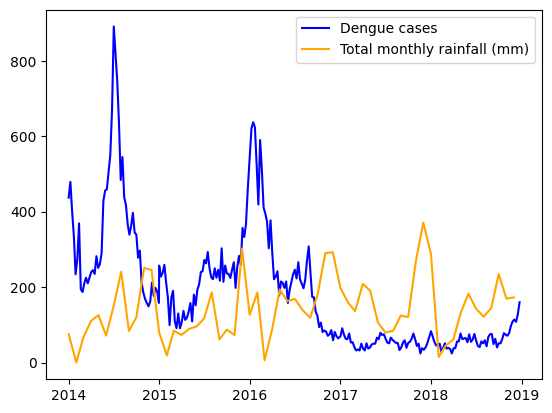

In [55]:
'''
This plot is useful for visualising the similarities in pattern for the dengue cases and total monthly rainfall,
but the shared scale of the x axis may be misleading as both data series use different units. The subplots in
the following cell are used instead for the presentation.
'''
# Both the dengue cases and total monthly rainfall on the same line plot
plt.plot(dengue['yearweek'], 
         dengue['number'],
         c = 'blue',
         label = 'Dengue cases')

plt.plot(weather['date'], 
         weather['rainfall'],
         c = 'orange',
         label = 'Total monthly rainfall (mm)')
plt.legend(loc='best')

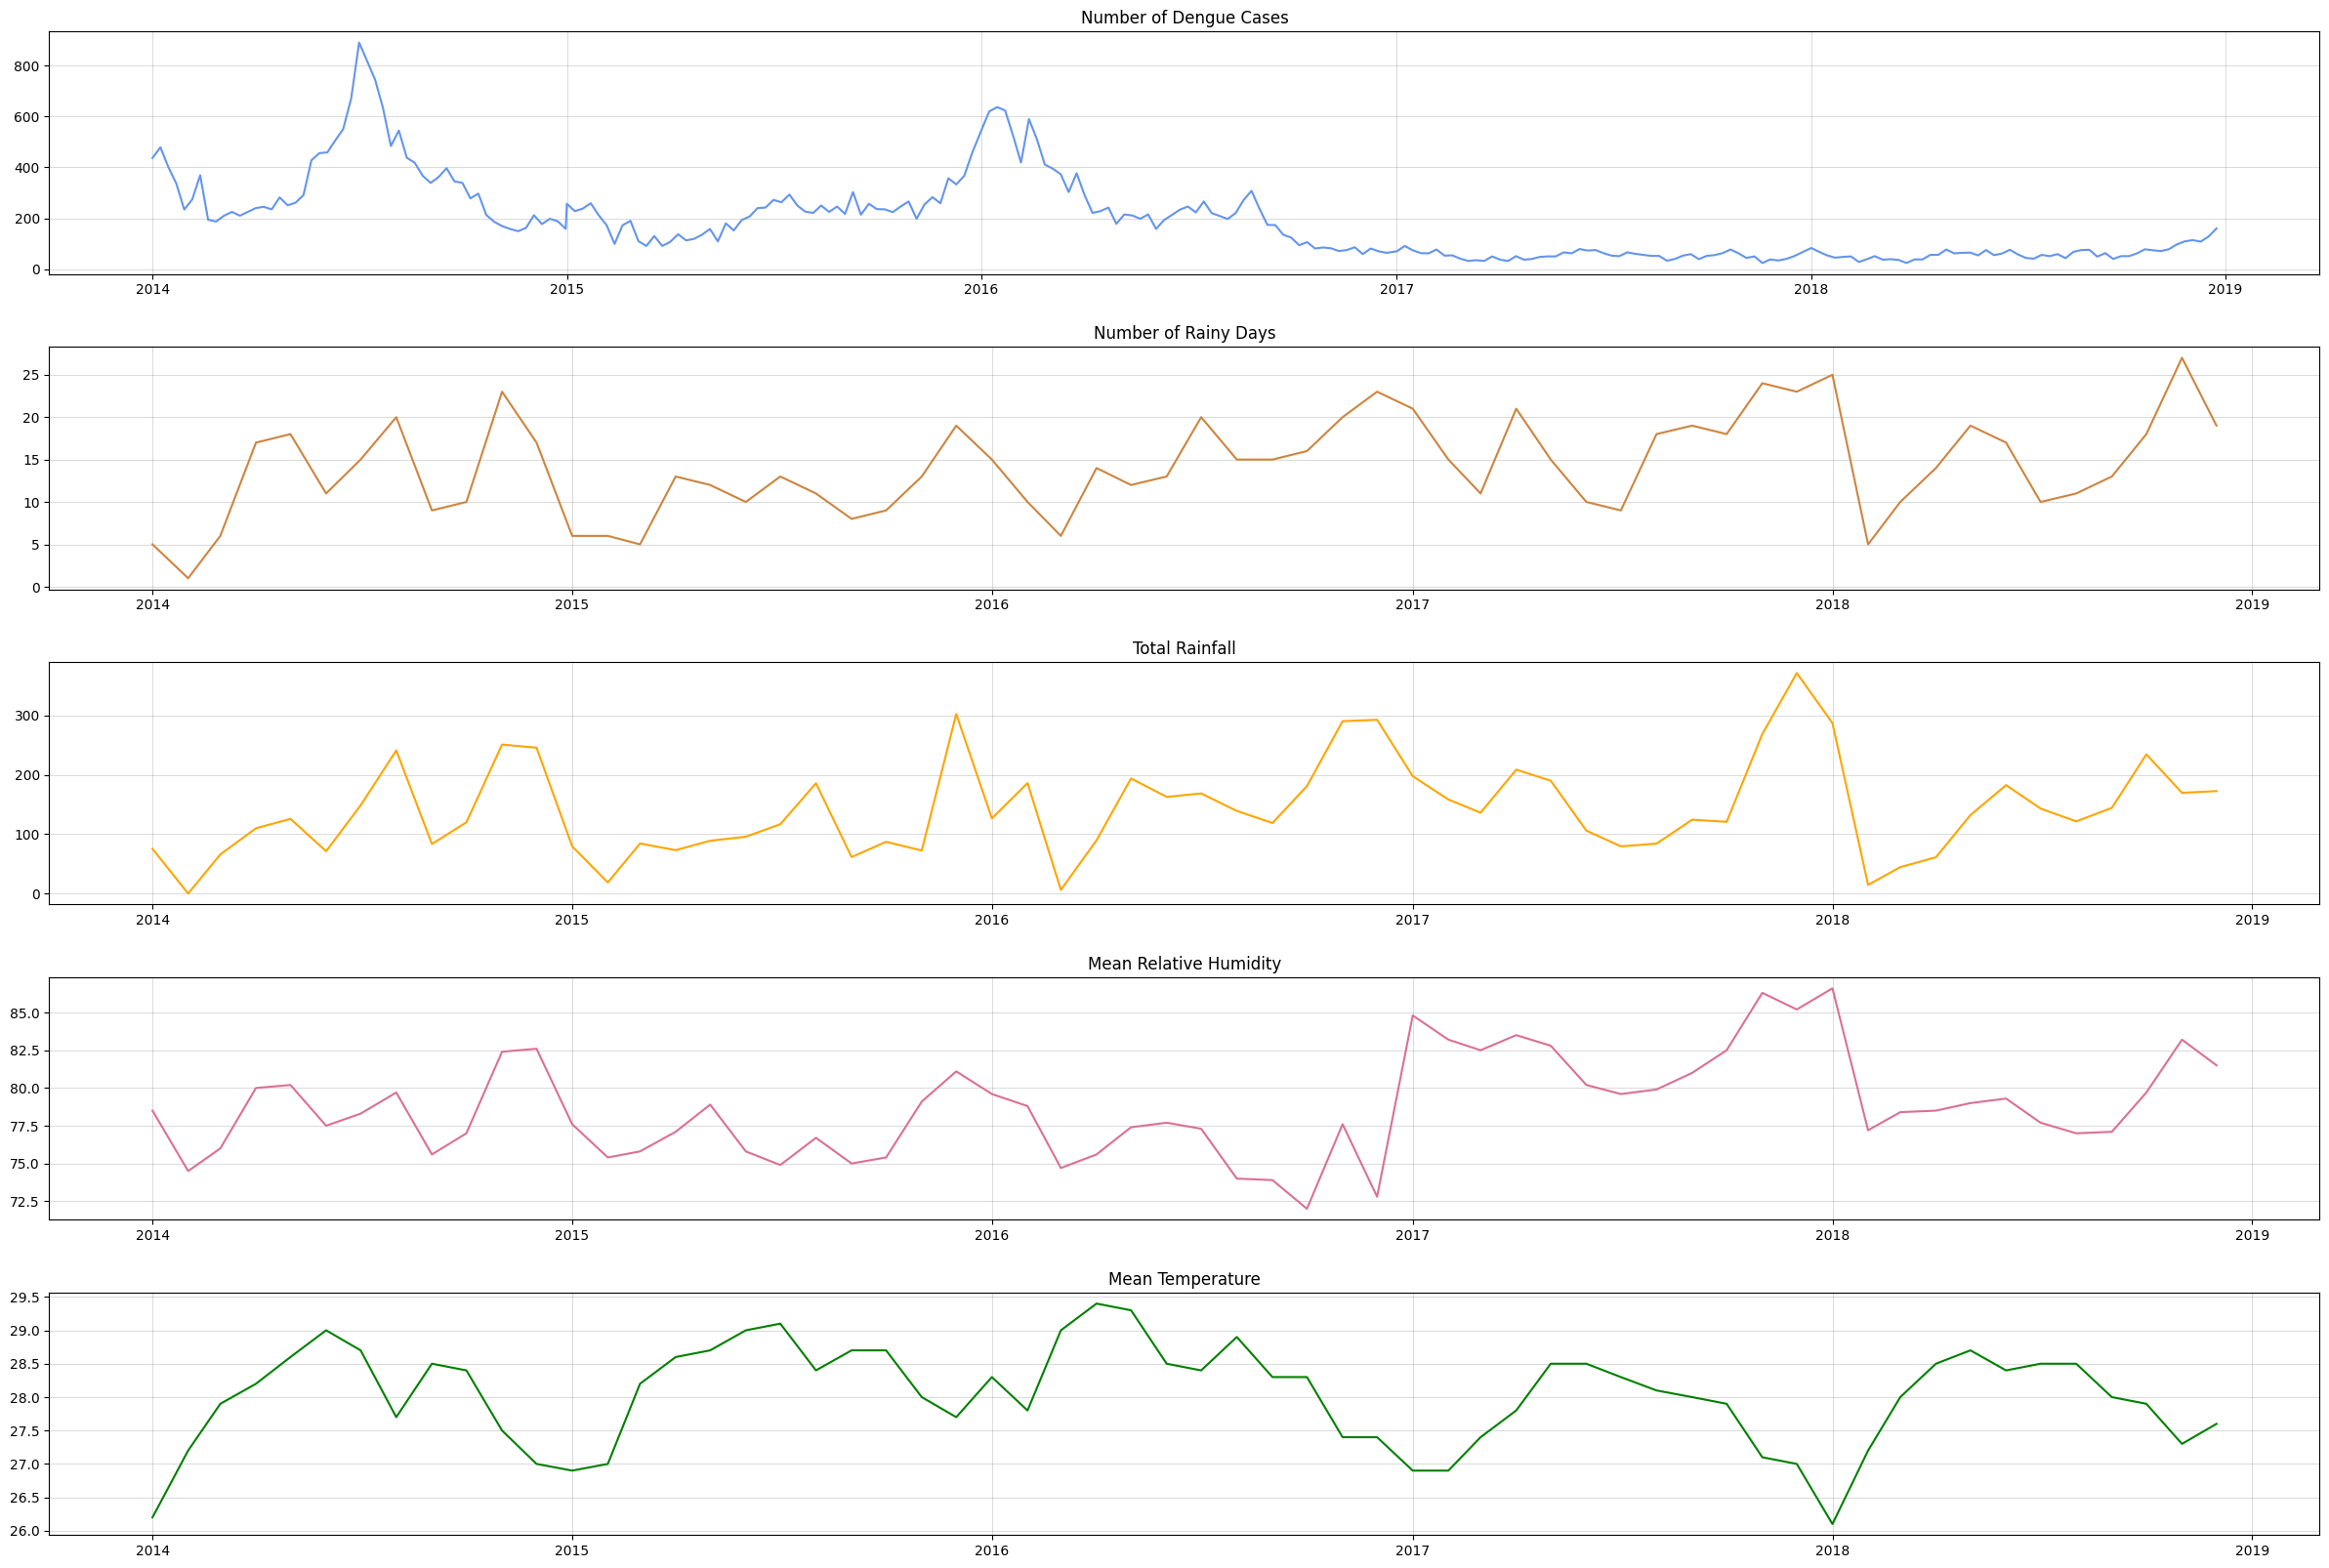

In [56]:
'''
The following subplots are useful in comparing the trends for the dengue cases data with the data from the weather
dataset. These plots are further analysed in detail during the presentation to identify shared trends.
'''
# Creating subplots for all the numeric data, using the same datetime x-axis
plt.figure(figsize = (30,20))# PLOT 1 - number of dengue cases
plt.subplot(5,1,1)
plt.plot(dengue['yearweek'],
         dengue['number'],
         c = 'cornflowerblue',
         label = 'Number of Dengue Cases')
plt.title("Number of Dengue Cases")# Create a grid in the background
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)# PLOT 2 - number of rainy days
plt.subplot(5,1,2)
plt.plot(weather['date'],
         weather['raindays'],
         c = 'peru',
         label = 'Number of Rainy Days')
plt.title("Number of Rainy Days")# Create a grid in the background
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)# PLOT 3 - total_rainfall
plt.subplot(5,1,3)
plt.plot(weather['date'],
         weather['rainfall'],
         c = 'orange',
         label = 'Rainfall')
plt.title("Total Rainfall")# Create a grid in the background
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)# PLOT 4 - mean relative humidity
plt.subplot(5,1,4)
plt.plot(weather['date'],
         weather['rh'],
         c = "palevioletred",
         label = 'Humidity')
plt.title("Mean Relative Humidity")
# Create a grid in the background
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)# PLOT 5 - mean temperature
plt.subplot(5,1,5)
plt.plot(weather['date'],
         weather['temp'],
         c = 'green',
         label = 'Temperature')
plt.title("Mean Temperature")
# Create a grid in the background
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)
plt.subplots_adjust(hspace = 0.3)
plt.show()

Observations from the line subplots:

1. As weather conditions such as rainy days and total rainfall increased towards mid 2014, the increase in dengue cases was observed to peak during the similar period.

2. Towards Nov 2015, rainfall and temperature spiked. The peak in the number of dengue cases was delayed by approximately 1 month after the peak of the respective weather conditions. 

3. From Oct 2016 onwards, the number of dengue cases dropped even though there were spikes/ drops in rainfall, temperature and relative humidity.

In [48]:
# This cell was used to generate the zoomed in plots for the presentation

# plt.figure(figsize = (30,20))
# plt.subplot(5,1,1)
# plt.plot(dengue['yearweek'].loc[(dengue['yearweek'].dt.year>2014) & (dengue['yearweek'].dt.year<2017)],
#          dengue['number'].loc[(dengue['yearweek'].dt.year>2014) & (dengue['yearweek'].dt.year<2017)],
#          c = 'cornflowerblue',
#          label = 'Number of Dengue Cases')
# plt.title("Number of Dengue Cases")
# plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)
# plt.subplot(5,1,2)
# plt.plot(weather['date'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          weather['raindays'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          c = 'peru',
#          label = 'Number of Rainy Days')
# plt.title("Number of Rainy Days")
# plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)
# plt.subplot(5,1,3)
# plt.plot(weather['date'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          weather['rainfall'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          c = 'orange',
#          label = 'Rainfall')
# plt.title("Total Rainfall")
# plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)
# plt.subplot(5,1,4)
# plt.plot(weather['date'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          weather['rh'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          c = "palevioletred",
#          label = 'Humidity')
# plt.title("Mean Relative Humidity")

# plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)
# plt.subplot(5,1,5)
# plt.plot(weather['date'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          weather['temp'].loc[(weather['date'].dt.year>2014) & (weather['date'].dt.year<2017)],
#          c = 'green',
#          label = 'Temperature')
# plt.title("Mean Temperature")

# plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.2)
# plt.subplots_adjust(hspace = 0.3)
# plt.show()

### Scatter plots for relationship between columns in `weather`

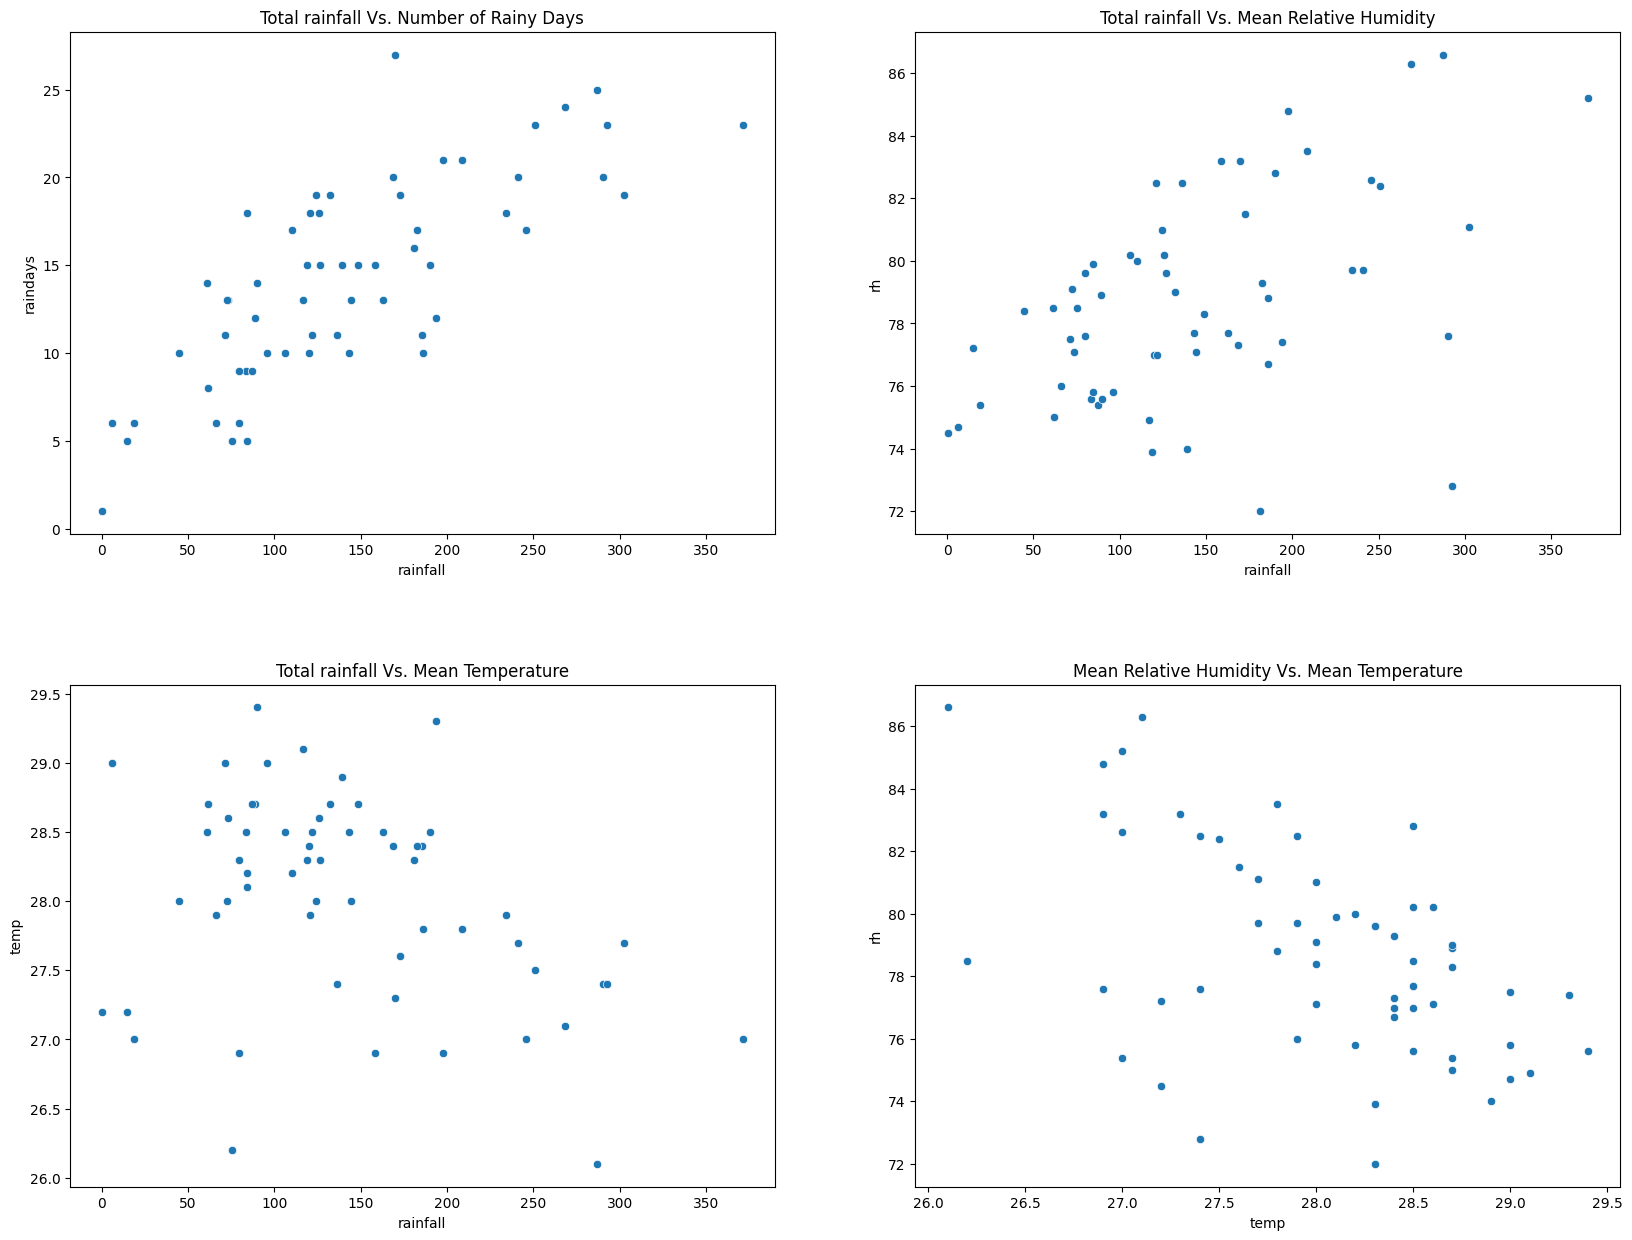

In [57]:
'''
These scatter plots help to visualise the collinearity for the diffrent data series within the weather dataset.
However, we are unable to plot the scatter plot for the dengue cases against these data series as the time scale
for the dengue data series (weeks) is different from the data in the weather dataset (months).
'''
# This is to show scatterplots of different weather conditions 

# to create the "grid" to put plots side by side
# plt.subplot(total how many rows, total how many columns, plot number what)
fig, axes = plt.subplots(2, 2, figsize=(20,15)) 


# PLOT 1 - plot for rainfall vs raindays
# plotting scatterplot
scatter_rain = sns.scatterplot(data = weather, x = "rainfall", y = "raindays" , ax = axes[0][0])

# setting the title of the graph
scatter_rain.set(title = "Total rainfall Vs. Number of Rainy Days")



# PLOT 2 - plot for rainfall vs rh
# plotting scatterplot
scatter_hum = sns.scatterplot(data = weather, x = "rainfall", y = "rh", ax = axes[0][1])

# setting the title of the graph
scatter_hum.set(title = "Total rainfall Vs. Mean Relative Humidity")


# PLOT 3 - plot for rainfall vs temp
# plotting scatterplot
scatter_temp = sns.scatterplot(data = weather, x = "rainfall", y = "temp", ax = axes[1][0])

# setting the title of the graph
scatter_temp.set(title = "Total rainfall Vs. Mean Temperature")



# PLOT 4 - plot for rh vs temp
# plotting scatterplot
scatter_temp = sns.scatterplot(data = weather, x = "temp", y = "rh", ax = axes[1][1])

# setting the title of the graph
scatter_temp.set(title = "Mean Relative Humidity Vs. Mean Temperature")
plt.subplots_adjust(hspace = 0.3)
plt.show()

### Box plots for columns in `weather`

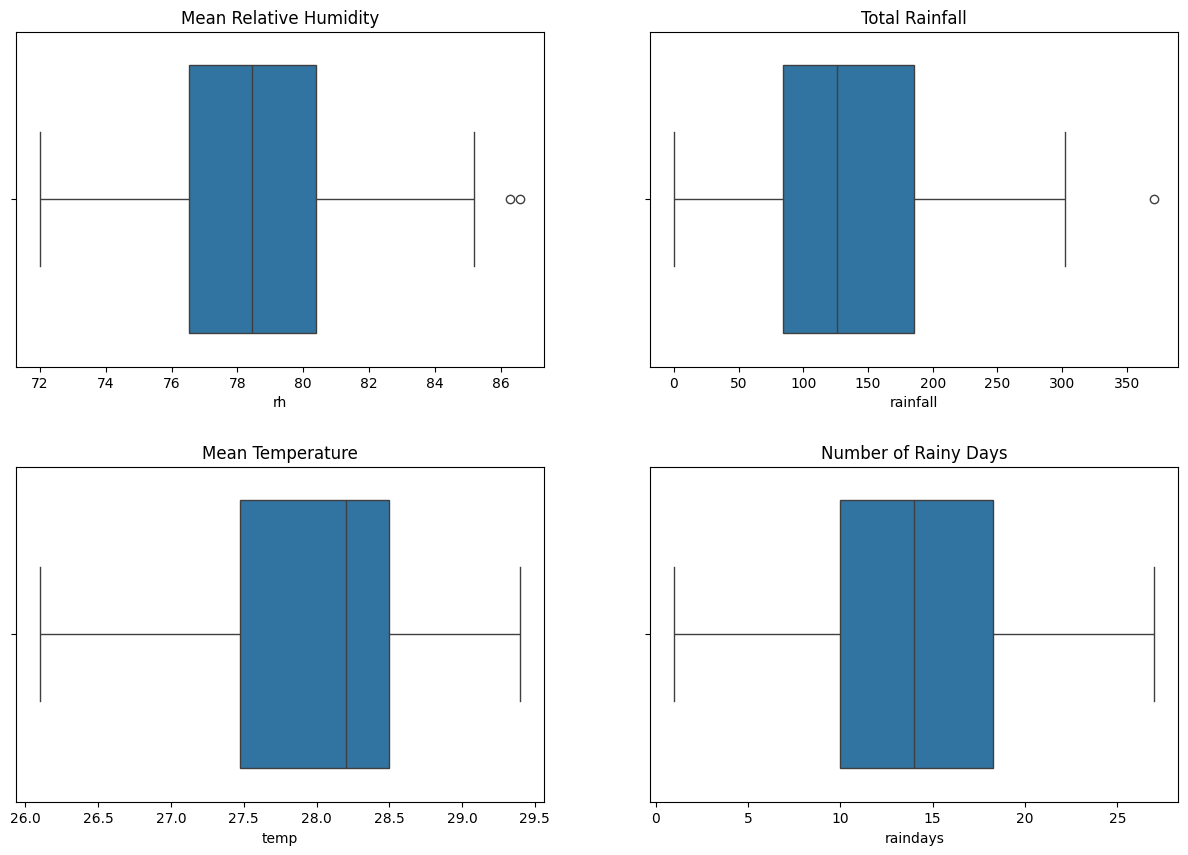

In [58]:
'''
Box plots for data series within the weather dataset, to help visualise number of outliers.
'''
# to create the "grid" to put plots side by side
# plt.subplot(total how many rows, total how many columns, plot number what)
fig, axes = plt.subplots(2, 2, figsize=(15,10)) 


# PLOT 1 - plot for mean_relative_humidity
# plotting barplot 
box_hum = sns.boxplot(x=weather["rh"], ax = axes[0][0])

# setting the x-axis, y-axis labels and title of the graphs
box_hum.set(title = 'Mean Relative Humidity')


# PLOT 2 - plot for mean_temp
# plotting barplot 
box_temp = sns.boxplot(x=weather["temp"], ax = axes[1][0])

# setting the x-axis, y-axis labels and title of the graphs
box_temp.set(title = 'Mean Temperature')


# PLOT 3 - plot for rainfall
# plotting barplot 
box_fall = sns.boxplot(x=weather["rainfall"], ax = axes[0][1])

# setting the x-axis, y-axis labels and title of the graphs
box_fall.set(title = 'Total Rainfall')


# PLOT 4 - plot for number of rainy days
# plotting barplot 
box_rain = sns.boxplot(x=weather["raindays"], ax = axes[1][1])

# setting the x-axis, y-axis labels and title of the graphs
box_rain.set(title = 'Number of Rainy Days')


plt.subplots_adjust(hspace = 0.3)
plt.show()

[Text(0.5, 1.0, 'Number of Dengue Cases')]

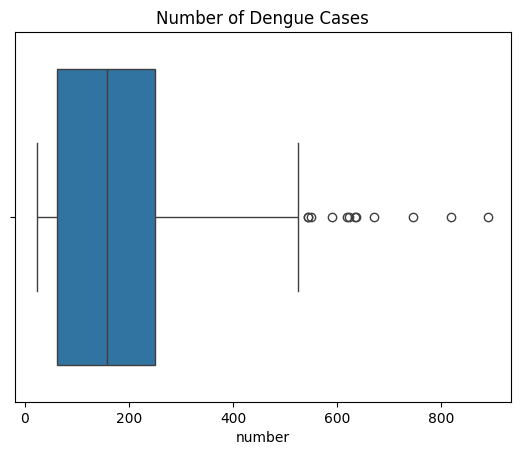

In [62]:
'''
Box plots for number of dengue cases, to help visualise number of outliers.
'''
sns.boxplot(x=dengue["number"]).set(title = 'Number of Dengue Cases')

### Heat map for columns in `weather`

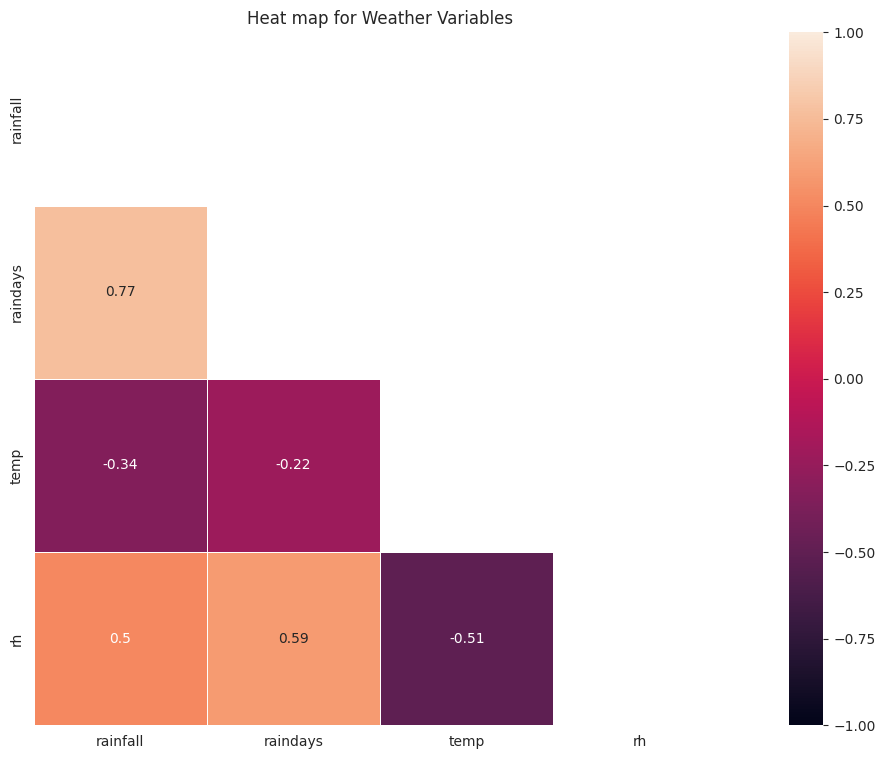

In [67]:
'''
Heat map for the variables within the weather dataset, to identify any correlations between weather variables.
The number of dengue cases cannot be compared with the other variables as the time frame is different from the other variables
in the weather dataset.
'''
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables. (statistical significance)
corr = weather.drop(columns='date').corr()

# Set up mask to be "True" in the upper triangle.
# because it will be the mirror image of lower triangle we'll see on our plot.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5).set(title = 'Heat map for Weather Variables')

## Conclusions and Recommendations

##### Insights:
- With the relationship between number of dengue cases and weather conditions, given a known/ estimated weather conditions’ profile, the profile of increase in dengue cases could be determined.

- A 1 month delay can be observed from the spike/ dips in weather conditions’ profile when compared with the plot for number of dengue cases.

- According to available research, the optimal temperature for the survival of Aedes aegypti has a mean of 27.5 deg C. This is supported by the line plot as dengue cases rise with temperatures above 27.5 deg C.

- However, after Oct 2016, the number of dengue cases did not drastically increase despite the spike/ dip in weather conditions as compared to prior patterns. This drop in number of dengue cases from Oct 2016 could be attributed to the launch of Project Wolbachia during the same time frame. This info potentially indicates the effectiveness of the project in curbing mosquito breeding and reducing dengue cases.

##### Reccomendations:
We propose for a time-specific release of Wolbachia mosquitoes to maximise cost-efficiency and optimal use of resources (e.g. manpower), while also reducing the ecological impact.

- Spike in rainfall/ temperature suggests to initial increase in dengue cases.
- Additionally, studies suggest that the life cycle of mosquito is approx. 2-4 weeks.
    
Thus, the release of Wolbachia male mosquitoes is recommended to be 2-4 weeks before the spike in rainfall/ temperature profile

##### Future work:
Prediction of profiles in spikes/ drops in weather conditions based on location would be critical in planning for the release of the mosquitoes. This information could be readily obtained for analysis; from wide availability of past historical data. Location data for mosquito outbreaks can also be utilised to better optimise the locations for the release of the Walbachia mosquitoes.
Partnership with meteorological services for minimal error in weather prediction could be explored

